# ENCM 509 Project - User Recognition Using Leap Motion and SVM


* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join, dirname, abspath
import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from utils_cm import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Setup

In [2]:
# the length of records (if shorter, we need to add some zero rows)
NUMBER_TIMESTEPS = 100
# the number of features (from the data)
NUMBER_FEATURES = 202
# the number of classes/gestures
NUMBER_OUTPUTS = 2
# you can encode more than 1 but for this example we have binary output (circle/swipe)

In [3]:
# the directory where your data is
mypath = './data_recollected'

# creating a list with all the filenames
datafiles = [f for f in listdir('data') if isfile(join(mypath, f))]

In [4]:
# choose data we need
columns = ['handPalmPosition_X','handPalmPosition_Y','handPalmPosition_Z',
          'pitch', 'roll', 'yaw',
          'wristPosition_X', 'wristPosition_Y','wristPosition_Z',
          'elbowPosition_X', 'elbowPosition_Y', 'elbowPosition_Z']

finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
bone_names = ['Metacarpal', 'Proximal', 'Intermediate', 'Distal']
    
for finger in finger_names:
    columns.append(finger + 'Length')
    columns.append(finger + 'Width')

for finger in finger_names:
    for bone in bone_names:
        columns.append(finger + bone + 'Start_X')
        columns.append(finger + bone + 'Start_Y')
        columns.append(finger + bone + 'Start_Z')
        columns.append(finger + bone + 'End_X')
        columns.append(finger + bone + 'End_Y')
        columns.append(finger + bone + 'End_Z')
        columns.append(finger + bone + 'Direction_X') 
        columns.append(finger + bone + 'Direction_Y') 
        columns.append(finger + bone + 'Direction_Z')   

In [5]:
# Features
x = []
# Labels
y = []

class1 = []
class2 = []
for sample in datafiles:
    relative_path = 'data/' + sample
    tmp = pd.read_csv(relative_path, usecols=columns)
    
    # Normalize the sample size
    print('{}\nsize raw = {}'.format(relative_path,tmp.shape))
    while tmp.shape[0] < NUMBER_TIMESTEPS:
        tmp = tmp.append(pd.Series(0, index=tmp.columns), ignore_index=True)

    if tmp.shape[0] > NUMBER_TIMESTEPS:
        tmp = tmp.head(100)
    print('size normalized = ',tmp.shape)
    
    tmp_x = tmp[[column for column in list(tmp.columns)]]

    tmp_y = [1,  0]
    if '2c' in sample or '2s' in sample:
        tmp_y = [0, 1]
        class2.append(tmp_x)
    else:
        class1.append(tmp_x)  
        
    x.append(tmp_x)
    y.append(tmp_y)

data/1c1.csv
size raw = (28, 202)
size normalized =  (100, 202)
data/1c10.csv
size raw = (23, 202)
size normalized =  (100, 202)
data/1c2.csv
size raw = (15, 202)
size normalized =  (100, 202)
data/1c3.csv
size raw = (13, 202)
size normalized =  (100, 202)
data/1c4.csv
size raw = (18, 202)
size normalized =  (100, 202)
data/1c5.csv
size raw = (25, 202)
size normalized =  (100, 202)
data/1c6.csv
size raw = (18, 202)
size normalized =  (100, 202)
data/1c7.csv
size raw = (24, 202)
size normalized =  (100, 202)
data/1c8.csv
size raw = (19, 202)
size normalized =  (100, 202)
data/1c9.csv
size raw = (48, 202)
size normalized =  (100, 202)
data/1s1.csv
size raw = (33, 202)
size normalized =  (100, 202)
data/1s10.csv
size raw = (24, 202)
size normalized =  (100, 202)
data/1s2.csv
size raw = (20, 202)
size normalized =  (100, 202)
data/1s3.csv
size raw = (22, 202)
size normalized =  (100, 202)
data/1s4.csv
size raw = (21, 202)
size normalized =  (100, 202)
data/1s5.csv
size raw = (18, 202)
size

In [50]:
len(x)
x[0].shape

(100, 202)

In [6]:
# Each sample requires labels of [1,NUMBER_OUTPUTS] size (not a list)
y_new = list()
for cur_label in y:
    tmp = np.array(cur_label[0])
    y_new.append(tmp)
y = np.array(y_new)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


### Comparsion of pitch, roll, and yaw for the two classes (for a single swipe gesture)

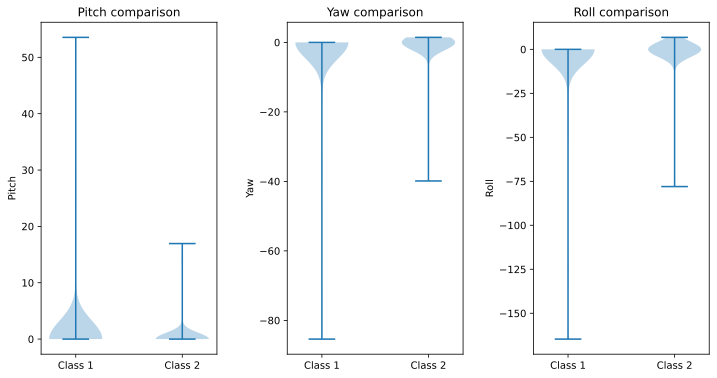

In [7]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

df1 = class1[18]
df2 = class2[18]

# pitch
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].violinplot([df1['pitch'], df2['pitch']])
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['Class 1', 'Class 2'])
axs[0].set_ylabel('Pitch')
axs[0].set_title('Pitch comparison')

# yaw
axs[1].violinplot([df1['yaw'], df2['yaw']])
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['Class 1', 'Class 2'])
axs[1].set_ylabel('Yaw')
axs[1].set_title('Yaw comparison')

# roll
axs[2].violinplot([df1['roll'], df2['roll']])
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(['Class 1', 'Class 2'])
axs[2].set_ylabel('Roll')
axs[2].set_title('Roll comparison')

plt.subplots_adjust(wspace=0.4)
plt.show()


## SVM Classification 

In [8]:
# Set a percentage of test set fraction
test_percent = 0.20 

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_percent, shuffle=True, random_state=1)
len_train = len(X_train)
len_test = len(X_test)

print ('Number of train samples = {}\nNumber of test samples = {}'.format(len_train, len_test))

# Turn list(DataFrame) into numpy.ndarray with [len_train, NUMBER_TIMESTEPS, NUMBER_FEATURES]
X_train = np.array(X_train)
X_test = np.array(X_test)

Number of train samples = 32
Number of test samples = 8


In [9]:
#reshaping x train and x test into the correct dimensions
nsamples, nx, ny = X_train.shape
d2_train_dataset = np.reshape(X_train, (32, -1))
nsamples, nx, ny = X_test.shape
d2_test_dataset = np.reshape(X_test, (8, -1))

### Using grid search + cross validation to determine the best hyperparameters and mean test scores

#### Also displaying confusion matrices for each hyperparameter combination

In [10]:
# Defining the hyperparameter grid
svc_params = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
}

# Performing grid search with cross-validation to find the best hyperparameters
svm = SVC()
grid_search = GridSearchCV(svm, param_grid=svc_params, cv=5)
grid_search.fit(d2_train_dataset, y_train)

# Printing the best hyperparameters and corresponding best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best score:  0.719047619047619


Match rate: 0.75


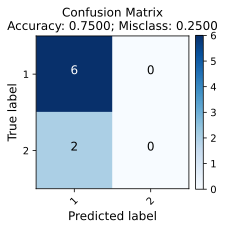

In [31]:
bestModel = SVC(**grid_search.best_params_).fit(d2_train_dataset, y_train)
y_pred = bestModel.predict(d2_test_dataset)
matches = (y_pred == y_test)
match_rate = matches.sum() / float(len(matches))
print('Match rate: %.2f' % (match_rate))
confusionMatrix = confusion_matrix(y_test, y_pred)
p = plot_confusion_matrix(cm=confusionMatrix,target_names = [i for i in range(1, 3)])
p.show()

In [30]:
# Print the mean test score for each combination of hyperparameters in table format
result = pd.DataFrame(grid_search.cv_results_['params']) #store each param combination tried in grid search in a df
col_order = ['kernel','C','gamma']
result = result[col_order]
result['Mean test score'] = grid_search.cv_results_['mean_test_score']#add the mean test score of each combination to the df

result = result.sort_values(by=['kernel','C','gamma']).reset_index(drop=True)
print(result)

     kernel    C  gamma  Mean test score
0    linear    1  0.001         0.657143
1    linear    1  0.010         0.657143
2    linear    1  0.100         0.657143
3    linear   10  0.001         0.657143
4    linear   10  0.010         0.657143
5    linear   10  0.100         0.657143
6    linear  100  0.001         0.657143
7    linear  100  0.010         0.657143
8    linear  100  0.100         0.657143
9      poly    1  0.001         0.719048
10     poly    1  0.010         0.719048
11     poly    1  0.100         0.719048
12     poly   10  0.001         0.719048
13     poly   10  0.010         0.719048
14     poly   10  0.100         0.719048
15     poly  100  0.001         0.719048
16     poly  100  0.010         0.719048
17     poly  100  0.100         0.719048
18      rbf    1  0.001         0.561905
19      rbf    1  0.010         0.561905
20      rbf    1  0.100         0.561905
21      rbf   10  0.001         0.561905
22      rbf   10  0.010         0.561905
23      rbf   10